# **<center>Bezier-Kurven</center>**

## Problemlösung

### Aufgabe 2:  
Andreas Hager

Zur Klärung der Aufgabenstellung haben wir die Quelle http://www.fachgruppe-computeralgebra.de/data/JdM-2008/Sonderheft.pdf (2008, S. 9-11) zu Rate gezogen. 

Aus dieser Quelle habe ich die Idee fuer den Algorithmus zum erstellen von Bezier-Kurven vom Grad 2, welchen ich auf kubische Kurven erweitert habe:

Seinen A, B, C, D element RxR  
Strecken AB, BC, CD  
Sei E element RxR ein Punkt auf der Strecke AB  
Sei t element R  
Wähle t so das t = AE / AD  
      => t element [0, 1]  
Wähle F, G, H, I, J element RxR,  
    so dass gilt:  
     F = B + t*BC  
     G = C + t*CD  
     H = E + t*EF  
     I = F + t*FG  
     J = H + t*HI 
Der Punkt J wandert auf der Kurve.

In [253]:
class CubicBezier:
    """
    :author Andreas Hager:
    Diese Klasse repräsentiert eine Kubische Bezier-Kurfe
    """
    
    def __init__(self, a, b, c, d):
        """initialisiert die Fixpunkte als Vektoren"""
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        
        t = var('t')
        assume(t >= 0)
        assume(t <= 1)
        
        self.e = self.a + t*(self.b - self.a)
        self.f = self.b + t*(self.c - self.b)
        self.g = self.c + t*(self.d - self.c)
        self.h = self.e + t*(self.f - self.e)
        self.i = self.f + t*(self.g - self.f)
        self.j = self.h + t*(self.i - self.h)

    def getExplicitFunction(self):
        return self.j
    
    def getKurve(self, upTo=1):
        function = self.getExplicitFunction()
        return parametric_plot((function[0], function[1]), (0, upTo), color=hue(0.6), thickness=2)
    
    def getPlotWithPoints(self):
        """Aufgabe 3"""
        punkte = [self.a, self.b, self.c, self.d]
        plot = list_plot(punkte, color='green', pointsize=30, figsize=6)
        plot += line([self.a, self.b], color='green', thickness=1)
        plot += line([self.b, self.c], color='green', thickness=1)
        plot += line([self.c, self.d], color='green', thickness=1)
        
        list = [self.e, self.f, self.g, self.h, self.i, self.j]

        sines = [ self.listPlotPoints(list, counter) + plot + self.drawLines(list, counter) + self. getKurve(counter/30)  for counter in range(1, 29)]
        animation = animate(sines)
        return animation
    
    def drawLines(self, list, counter=30):
        value = counter/30
        plot = line([(list[0][0](value), list[0][1](value)), (list[1][0](value), list[1][1](value))], color='green', thickness=1)
        plot += line([(list[1][0](value), list[1][1](value)), (list[2][0](value), list[2][1](value))], color='green', thickness=1)
        plot += line([(list[3][0](value), list[3][1](value)), (list[4][0](value), list[4][1](value))], color='green', thickness=1)
        return plot
        
    def listPlotPoints(self, list, counter=30):
        return list_plot([(list[i][0](counter/30), list[i][1](counter/30))  for i in range(len(list))], color = 'green')
        

(-2*((40*t - 19)*t + 3*(11*t - 7)*t - 40*t + 19)*t + 2*(40*t - 19)*t - 38*t + 10, -((10*t + 9)*t - 9*(4*t - 3)*t + 36*t - 27)*t - 9*(4*t - 3)*t + 27*t + 1)


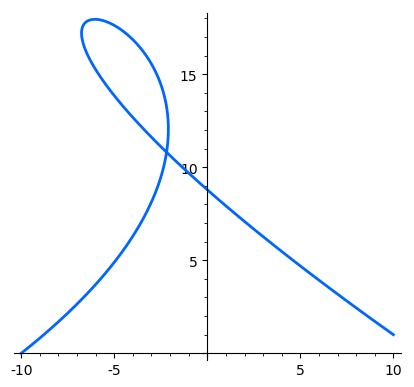

/opt/sagemath-8.6/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:42: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.


Animation with 28 frames
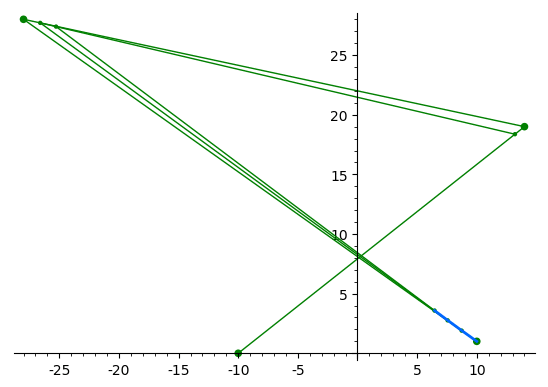

In [251]:
a = vector([10, 1])
b = vector([-28, 28])
c = vector([14, 19])
d = vector([-10, 0])


cubic = CubicBezier(a, b, c, d)

function = cubic.getExplicitFunction()
print(function)

plot = cubic.getKurve()
show(plot)

animation = cubic.getPlotWithPoints()
show(animation)
